In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

IMG_SIZE = (64, 64)

train_ds = tf.keras.utils.image_dataset_from_directory(
    "D:/robo-sumr-2025/project/data/asl_alphabet_train",
    image_size=IMG_SIZE,
    batch_size=32,
    label_mode="int"
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "D:/robo-sumr-2025/project/data/asl_alphabet_test",
    image_size=IMG_SIZE,
    batch_size=32,
    label_mode="int"
)

Found 84000 files belonging to 28 classes.
Found 28 files belonging to 28 classes.


In [3]:
import numpy as np

x_train, y_train = [], []
for images, labels in train_ds:
    x_train.append(images.numpy())
    y_train.append(labels.numpy())

x_val, y_val = [], []
for images, labels in val_ds:
    x_val.append(images.numpy())
    y_val.append(labels.numpy())

x_train = np.vstack(x_train)
y_train = np.hstack(y_train)

x_val = np.vstack(x_val)
y_val = np.hstack(y_val)

In [4]:
x_train = x_train / 255.0
x_test = x_val / 255.0

In [5]:
from tensorflow.python.keras.utils.np_utils import to_categorical

num_classes = len(train_ds.class_names)

y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_val, num_classes)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(64, 64, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(64, 64, 3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

D:\robo-sumr-2025\project\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.add(Flatten())

In [9]:
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(28, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [11]:
final = model.fit(x_train, y_train,
              epochs=2,
              batch_size=64,
              validation_split=0.2,
              )

Epoch 1/2
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 547s 520ms/step - accuracy: 0.3394 - loss: 2.3759 - val_accuracy: 0.5866 - val_loss: 1.2903
Epoch 2/2
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 567s 540ms/step - accuracy: 0.6012 - loss: 1.2454 - val_accuracy: 0.5284 - val_loss: 4.3172


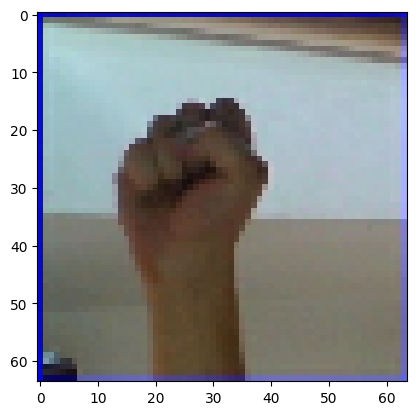

In [26]:
import matplotlib.pyplot as plt
my_image = x_test[18]
plt.imshow(my_image)

In [27]:
y_test[18]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [28]:
np.argmax(model.predict(my_image.reshape(1, 64, 64, 3)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


np.int64(16)